In [58]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [90]:
import numpy as np
import matplotlib.pyplot as plt
from alphacsc import learn_d_z, BatchCDL
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import polars as pl
from pathlib import Path

from transphorm.model_components.model_modules import CDLTrainer, CDLAnalyzer, calculate_mse_list


from transphorm.preprocessors.loaders import AADataLoader
from transphorm.analyzers import ARHMMAnalyzer
from dotenv import load_dotenv

load_dotenv()


True

In [91]:
# model_path = Path("/projects/p31961/transphorm/models/arhmm/mutual_title_6196.joblib")
data_path = Path("/Users/mds8301/Desktop/temp/da_full_timeseries_partitioned_learning.pt")
# model = joblib.load(model_path)
loader = AADataLoader(data_path,
                      butter_filter=True, 
                      weiner_filter=True,
                      weiner_window_size=1000,
                      smoothing=True,
                      smoothing_window_size=250,
                      down_sample=True, 
                      down_sample_factor=300)
loader.load_data()
loader.prepare_data()


In [92]:
loader.train.shape


(86, 4175)

In [93]:
# Solver-specific parameters for sparsity
down_sample_factor = 300
sec = 1017 / down_sample_factor
solver_d_kwargs = {
    'tol': 1e-3,
    'maxiter': 1000,
    'factr': 1e5,
    'pgtol': 1e-3,
    'l1_ratio': 0.09  # Uncomment if your solver supports this
}

params = {
    "n_times_atom": int(90* sec),  # L   # T
    "n_atoms": 3,         # K      # N
    "n_iter": 5,
    "reg":0.05,
    "random_state": 60,
    "n_jobs": 1,
    "verbose": 10,
}






In [94]:

csc = CDLTrainer(**params, solver_d_kwargs=solver_d_kwargs)
csc.fit_csc(loader.train)

Coordinate descent loop 0 / 5 [n_jobs=1]
[seed 60] Objective (z_hat) : 83239.69819978
Using method dual for projection
[seed 60] Objective (d) 74048.52195602
Coordinate descent loop 1 / 5 [n_jobs=1]
[seed 60] Objective (z_hat) : 32858.77945480
Using method dual for projection
[seed 60] Objective (d) 28992.14629542
Coordinate descent loop 2 / 5 [n_jobs=1]
[seed 60] Objective (z_hat) : 23058.46019870
Using method dual for projection
[seed 60] Objective (d) 22538.16216493
Coordinate descent loop 3 / 5 [n_jobs=1]
[seed 60] Objective (z_hat) : 21062.51402937
Using method dual for projection
[seed 60] Objective (d) 20848.41624816
Coordinate descent loop 4 / 5 [n_jobs=1]
[seed 60] Objective (z_hat) : 19671.22395425
Using method dual for projection
[seed 60] Objective (d) 19542.25922434


In [96]:
z_hat_train = csc.transform(loader.train)
x_hat_train = csc.reconstruct(z_hat_train)

z_hat_test = csc.transform(loader.test)
x_hat_test = csc.reconstruct(z_hat_test)


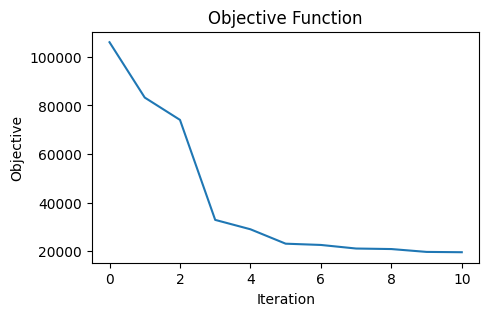

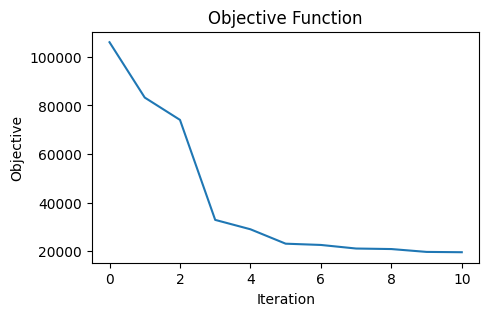

In [97]:
zer = CDLAnalyzer(csc, loader)
zer.train_x_hat = x_hat_train
zer.test_x_hat = x_hat_test
zer.compute_mses()
zer.plot_pobjective()


In [80]:
zer.train_x_hat.shape

(86, 4175)

In [81]:
import multiprocessing
multiprocessing.cpu_count()

12

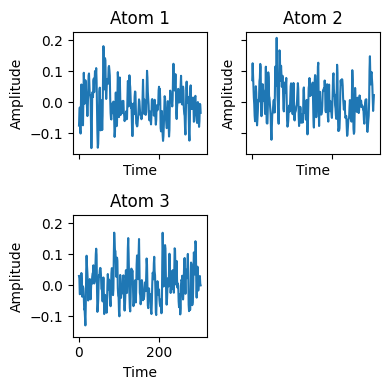

<Figure size 640x480 with 0 Axes>

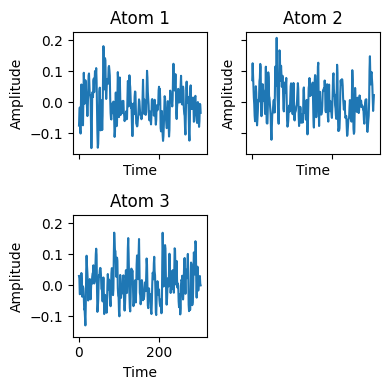

In [98]:
zer.plot_atoms()

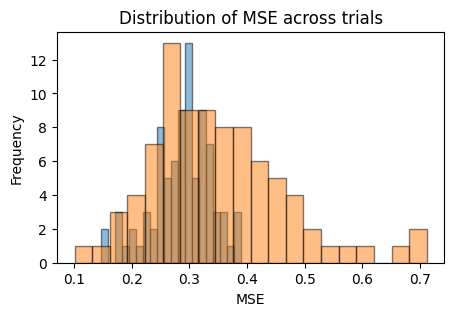

<Figure size 640x480 with 0 Axes>

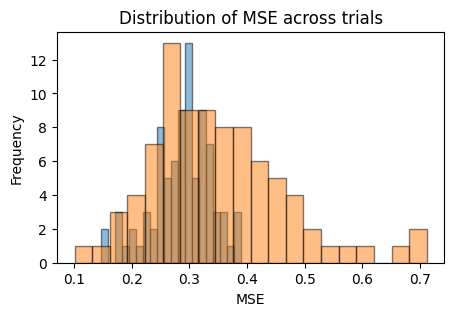

In [99]:
zer.plot_mse_distribution()

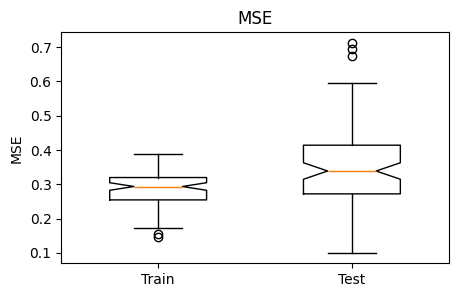

<Figure size 640x480 with 0 Axes>

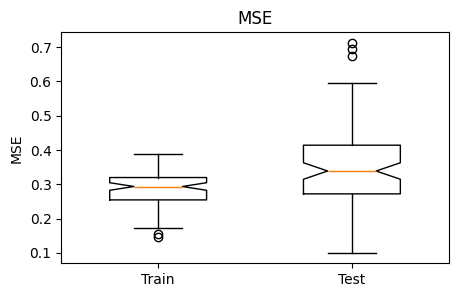

In [100]:
zer.mse_boxplot()

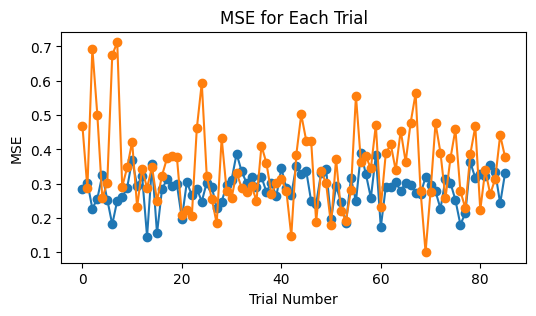

<Figure size 640x480 with 0 Axes>

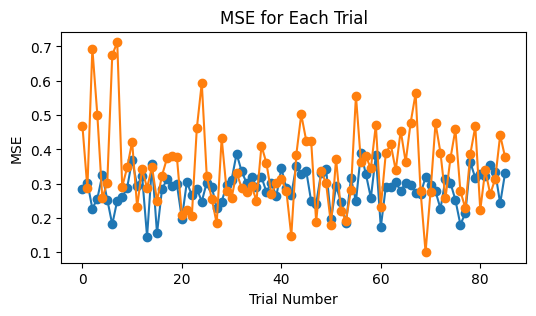

In [101]:
zer.plot_mse_by_trial()

In [102]:
zer.test_mse
# loader.test.shape


0.34801560602101367

In [103]:
zer.test_x_hat.shape

(86, 1, 836)

In [104]:
zer.test_x_hat.shape

(86, 1, 836)

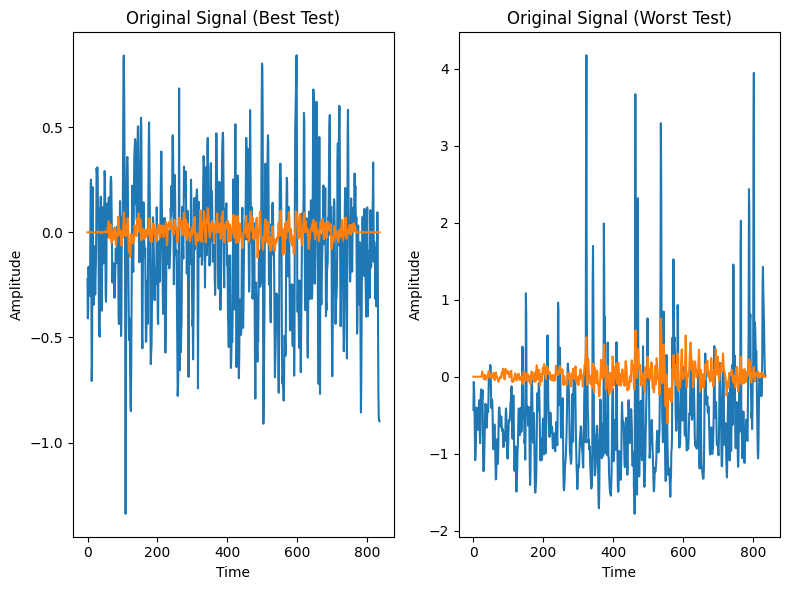

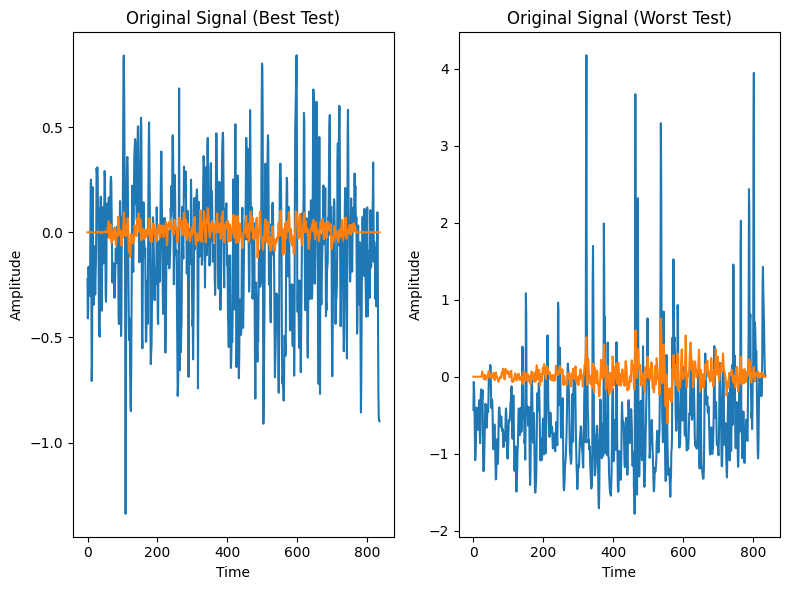

In [105]:
zer.plot_best_and_worst_reconstructions()
